<a href="https://colab.research.google.com/github/mikaelaconnell/Breast_Cancer_Analysis/blob/main/BCG_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task One**

This notebook is part of the BCG GenAI Consulting Forage project. The goal is to analyze financial data from the 10-K reports of Microsoft, Tesla, and Apple over the past three fiscal years. This analysis supports the development of an AI-powered chatbot that provides accessible financial insights.

# **Methodology**

1. **Data Collection**:
  * 10-K filings were retrieved from the SEC EDGAR database for Microsoft, Tesla, and Apple. Years covered: FY2022, FY2023, and FY2024.
  * Metrics extracted: Total Revenue, Net Income, Total Assets, Total Liabilities, & Cash Flow from Operating Activities


2. **Data Cleaning & Preparation**:
  * Monetary values (e.g., $211,915) were cleaned by removing symbols and commas.
  * All values were converted to float format and standardized to millions USD.
  * Fiscal years were treated as integer values and sorted chronologically.

3. **Analysis Techniques**:
  * Year-over-Year (YoY) growth was calculated using pandas' .pct_change() method for each financial metric.
  * Trends were visualized using line plots and grouped summaries to understand performance patterns.
  * Observations were made based on both absolute values and changes over time.

In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# load data
df = pd.read_csv('data.csv')

In [13]:
# view data
df.head(10)

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow
0,Microsoft,2024,"$245,122","$88,136","$512,163","$243,686","$118,548"
1,Microsoft,2023,"$211,915","$72,361","$411,976","$205,753","$87,582"
2,Microsoft,2022,"$198,270","$72,738","$364,840","$198,298","$89,035"
3,Tesla,2024,"$97,690","$7,153","$122,070","$48,390","$14,923"
4,Tesla,2023,"$96,773","$14,974","$106,618","$43,009","$13,256"
5,Tesla,2022,"$81,462","$12,587","$82,338","$36,440","$14,724"
6,Apple,2024,"$391,035","$93,736","$364,980","$308,030","$118,254"
7,Apple,2023,"$383,285","$96,995","$352,583","$290,437","$110,543"
8,Apple,2022,"$294,328","$99,803","$352,755","$302,083","$122,151"


In [16]:
# convert string values to floats
df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)
df['Net Income'] = df['Net Income'].replace('[\$,]', '', regex=True).astype(float)
df['Total Assets'] = df['Total Assets'].replace('[\$,]', '', regex=True).astype(float)
df['Total Liabilities'] = df['Total Liabilities'].replace('[\$,]', '', regex=True).astype(float)
df["Operating Cash Flow"] = df["Operating Cash Flow"].replace('[\$,]', '', regex=True).astype(float)


In [17]:
df.head()

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow
0,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0
1,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0
2,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0
3,Tesla,2024,97690.0,7153.0,122070.0,48390.0,14923.0
4,Tesla,2023,96773.0,14974.0,106618.0,43009.0,13256.0


In [28]:
# calculate year over year metrics
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Operating Cash Flow'].pct_change() * 100


In [29]:
df.head(10)

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,Apple,2022,294328.0,99803.0,352755.0,302083.0,122151.0,NaN,NaN,NaN,NaN,NaN
1,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0,30.223764,-2.813543,-0.048759,-3.855232,-9.502992
2,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0,2.021994,-3.359967,3.516052,6.057424,6.975566
3,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0,NaN,NaN,NaN,NaN,NaN
4,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0,6.882030,-0.518299,12.919636,3.759493,-1.631942
5,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0,15.669962,21.800417,24.318650,18.436183,35.356580
6,Tesla,2022,81462.0,12587.0,82338.0,36440.0,14724.0,NaN,NaN,NaN,NaN,NaN
7,Tesla,2023,96773.0,14974.0,106618.0,43009.0,13256.0,18.795267,18.964010,29.488207,18.026894,-9.970117
8,Tesla,2024,97690.0,7153.0,122070.0,48390.0,14923.0,0.947578,-52.230533,14.492862,12.511335,12.575438


In [24]:
# convert fiscal year to int
df['Fiscal Year'] = df['Fiscal Year'].astype(int)

In [25]:
# Sort values by fiscal year
df = df.sort_values(by=['Company', 'Fiscal Year']).reset_index(drop=True)

In [30]:
# calculate summary statistics
df.groupby('Company')[['Total Revenue', 'Net Income', 'Operating Cash Flow']].describe()


Total Revenue                                                   \
                  count           mean           std       min       25%   
Company                                                                    
Apple               3.0  356216.000000  53736.477676  294328.0  338806.5   
Microsoft           3.0  218435.666667  24097.028786  198270.0  205092.5   
Tesla               3.0   91975.000000   9116.062692   81462.0   89117.5   

                                        Net Income                ...  \
                50%       75%       max      count          mean  ...   
Company                                                           ...   
Apple      383285.0  387160.0  391035.0        3.0  96844.666667  ...   
Microsoft  211915.0  228518.5  245122.0        3.0  77745.000000  ...   
Tesla       96773.0   97231.5   97690.0        3.0  11571.333333  ...   

                            Operating Cash Flow                               \
               75%      max               count           mean           std   
Company                                                                        
Apple      98399.0  99803.0                 3.0  116982.666667   5907.506440   
Microsoft  80437.0  88136.0                 3.0   98388.333333  17473.892592   
Tesla      13780.5  14974.0                 3.0   14301.000000    910.449889   

                                                             
                min       25%       50%       75%       max  
Company                                                      
Apple      110543.0  114398.5  118254.0  120202.5  122151.0  
Microsoft   87582.0   88308.5   89035.0  103791.5  118548.0  
Tesla       13256.0   13990.0   14724.0   14823.5   14923.0  

[3 rows x 24 columns]

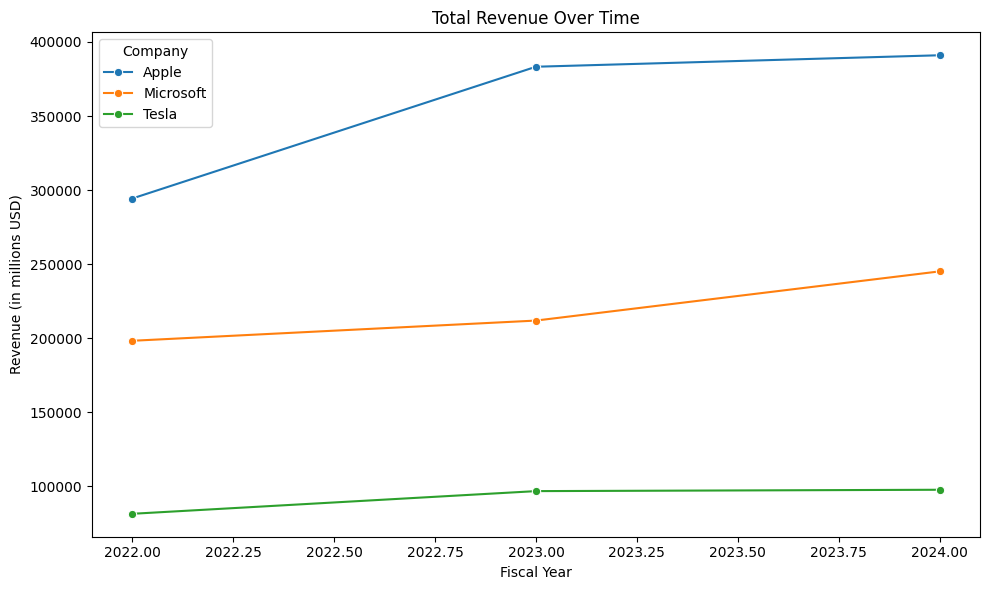

In [31]:
# plot trends
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Fiscal Year', y='Total Revenue', hue='Company', marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Revenue (in millions USD)')
plt.xlabel('Fiscal Year')
plt.tight_layout()
plt.show()


# **Conclusion & Insights:**

**Microsoft** appears to be the most stable performer, with consistent revenue and cash flow and a healthy balance sheet.

**Tesla** is rapidly growing and innovating, but its higher liabilities and volatility in earnings may require caution from risk-averse stakeholders.

**Apple** continues to generate the highest revenue and cash flow, though growth has plateaued recently. The company may be entering a maturity phase.